In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (30, 398)
x test:  (30, 171)
y train:  (398,)
y test:  (171,)


In [6]:
# sklearn library
from sklearn.linear_model import LogisticRegression

# linear regression model
log_reg = LogisticRegression()
log_reg.fit(x_train.T,y_train.T)

print("score: ",log_reg.score(x_test.T,y_test.T))

score:  0.9766081871345029


score:  0.9766081871345029
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



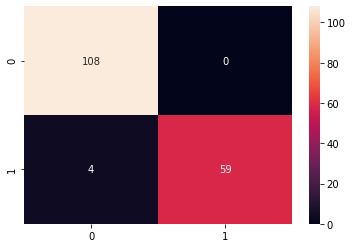

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",log_reg.score(x_test.T,y_test.T))
prediction = log_reg.predict(x_test.T)
cm = confusion_matrix(y_test.T,prediction)
print(classification_report(y_test.T, prediction))
sns.heatmap(cm,annot=True,fmt="d") 